# Curso Python para Data Science

## Importando e lendo arquivos json

In [539]:
import pandas as pd

In [540]:
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=f')
nomes_f.head(3)

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F


In [541]:
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=m')
nomes_m.head(3)

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M


In [542]:
lista = [nomes_f, nomes_m]

In [543]:
nomes = pd.concat(lista)['nome'].to_frame()
nomes.head()

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA


In [544]:
nomes.sample(5)

,nome
15,BRUNO
13,BRUNA
9,MARCOS
4,ADRIANA
6,MARCIA


## Criando ID's aleatorios para os alunos

In [545]:
import numpy as np

In [546]:
np.random.seed(123)

In [547]:
len(nomes)

40

In [548]:
nomes['id_aluno'] = np.random.permutation(len(nomes))

In [549]:
nomes

,nome,id_aluno
0,MARIA,6
1,ANA,10
2,FRANCISCA,12
3,ANTONIA,38
4,ADRIANA,5
5,JULIANA,11
6,MARCIA,23
7,FERNANDA,1
8,PATRICIA,13
9,ALINE,20


In [550]:
dominios = ['@dominioemail.com.br', '@servicoemail.com']

In [551]:
nomes['dominio'] = np.random.choice(dominios, len(nomes))
nomes

,nome,id_aluno,dominio
0,MARIA,6,@servicoemail.com
1,ANA,10,@dominioemail.com.br
2,FRANCISCA,12,@dominioemail.com.br
3,ANTONIA,38,@servicoemail.com
4,ADRIANA,5,@dominioemail.com.br
5,JULIANA,11,@servicoemail.com
6,MARCIA,23,@dominioemail.com.br
7,FERNANDA,1,@dominioemail.com.br
8,PATRICIA,13,@servicoemail.com
9,ALINE,20,@dominioemail.com.br


In [552]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [553]:
nomes.sample(5)

,nome,id_aluno,dominio,email
0,MARIA,6,@servicoemail.com,maria@servicoemail.com
5,JULIANA,11,@servicoemail.com,juliana@servicoemail.com
10,SANDRA,8,@servicoemail.com,sandra@servicoemail.com
14,MARCELO,22,@servicoemail.com,marcelo@servicoemail.com
13,BRUNA,7,@dominioemail.com.br,bruna@dominioemail.com.br


# Criando tabela de Cursos

In [554]:
cursos = pd.read_html('http://tabela-cursos.herokuapp.com/index.html')
cursos = cursos[0]
cursos.sample(5)

,Nome do curso
4,Cursos de Python
2,C# para Web
7,Novas integrações com Java
18,Boas práticas em Java
9,Código limpo com C#


In [555]:
cursos.rename(columns={'Nome do curso': 'nome_do_curso'}, inplace=True)
cursos.sample(5)

,nome_do_curso
14,Análise de dados
2,C# para Web
13,Desenvolvendo jogos
5,PHP com MySql
17,Programação funcional


In [556]:
cursos['id_cursos'] = cursos.index + 1

In [557]:
cursos.sample(5)

,nome_do_curso,id_cursos
2,C# para Web,3
0,Lógica de programação,1
18,Boas práticas em Java,19
12,Persistência com .NET,13
3,Ruby on Rails,4


In [558]:
cursos.set_index('id_cursos', inplace=True)
cursos.sample(5)

,nome_do_curso
id_cursos,
5,Cursos de Python
1,Lógica de programação
7,.NET para web
16,Estatística básica
12,Hardware básico


## Matriculando os alunos nos cursos

In [559]:
nomes.head()

,nome,id_aluno,dominio,email
0,MARIA,6,@servicoemail.com,maria@servicoemail.com
1,ANA,10,@dominioemail.com.br,ana@dominioemail.com.br
2,FRANCISCA,12,@dominioemail.com.br,francisca@dominioemail.com.br
3,ANTONIA,38,@servicoemail.com,antonia@servicoemail.com
4,ADRIANA,5,@dominioemail.com.br,adriana@dominioemail.com.br


In [560]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=len(nomes)) * 1.5).astype(int)

In [561]:
nomes.head()

,nome,id_aluno,dominio,email,matriculas
0,MARIA,6,@servicoemail.com,maria@servicoemail.com,3
1,ANA,10,@dominioemail.com.br,ana@dominioemail.com.br,1
2,FRANCISCA,12,@dominioemail.com.br,francisca@dominioemail.com.br,2
3,ANTONIA,38,@servicoemail.com,antonia@servicoemail.com,1
4,ADRIANA,5,@dominioemail.com.br,adriana@dominioemail.com.br,2


In [562]:
nomes.matriculas.describe()

count    40.000000
mean      2.050000
std       1.299901
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       7.000000
Name: matriculas, dtype: float64

In [563]:
import seaborn as sns

C:\Users\walas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

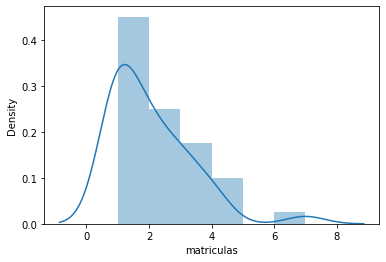

In [564]:
sns.distplot(nomes.matriculas)

In [565]:
nomes.matriculas.value_counts()

1    18
2    10
3     7
4     4
7     1
Name: matriculas, dtype: int64

## Selecionando Cursos por aluno

In [566]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [567]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)

In [568]:
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])
matriculas.head(5)

,id_aluno,id_curso
0,6,18
1,6,12
2,6,3
3,10,15
4,12,6


In [569]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [570]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,9,Lógica de programação
2,6,Java para Web
3,6,C# para Web
5,9,Cursos de Python
6,5,PHP com MySql
7,11,.NET para web
8,1,Novas integrações com Java
9,1,TDD com Java
11,3,Preparatório para certificação Java


In [571]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', sep=';')

## Lidando com banco de dados SQL

In [572]:
!pip install sqlalchemy

In [573]:
from sqlalchemy import create_engine, MetaData, Table

In [574]:
engine = create_engine('sqlite:///:memory:')

In [575]:
type(engine)

sqlalchemy.engine.base.Engine

In [576]:
matriculas_por_curso.to_sql('matriculas_por_curso', engine)

16

In [577]:
engine.table_names()

C:\Users\walas\AppData\Local\Temp\ipykernel_2316\509743474.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['matriculas_por_curso']

## Query SQL

In [578]:
query_sql = 'select * from matriculas_por_curso where quantidade_de_alunos < 10'

In [579]:
pd.read_sql(query_sql, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,1,9,Lógica de programação
1,2,6,Java para Web
2,3,6,C# para Web
3,5,9,Cursos de Python
4,6,5,PHP com MySql
5,8,1,Novas integrações com Java
6,9,1,TDD com Java
7,11,3,Preparatório para certificação Java
8,12,1,Hardware básico
9,13,7,Persistência com .NET


In [580]:
muitas_matriculas = pd.read_sql(query_sql, engine)

In [581]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 5')
muitas_matriculas

,id_curso,quantidade_de_alunos,nome_do_curso
0,1,9,Lógica de programação
1,2,6,Java para Web
2,3,6,C# para Web
3,5,9,Cursos de Python
9,13,7,Persistência com .NET
11,16,6,Estatística básica
14,20,7,Orientação objetos com Java


In [582]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

7

## Proximas turmas do curso

In [583]:
matriculas.head()

,id_aluno,id_curso
0,6,18
1,6,12
2,6,3
3,10,15
4,12,6


In [584]:
id_curso = 1
proxima_turma = matriculas.query(f'id_curso == {id_curso}')
proxima_turma

,id_aluno,id_curso
6,38,1
8,5,1
13,23,1
21,13,1
41,16,1
47,26,1
52,27,1
70,22,1
73,17,1


In [585]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()
proxima_turma

,nome
id_aluno,
38,ANTONIA
5,ADRIANA
23,MARCIA
13,PATRICIA
16,MARIANA
26,ANTONIO
27,PAULO
22,MARCELO
17,EDUARDO


In [586]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Lógica de programação
Name: 1, dtype: object

In [587]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Lógica de programação'

In [588]:
proxima_turma.rename(columns={'nome': f'Alunos curso {nome_curso}'})

,Alunos curso Lógica de programação
id_aluno,
38,ANTONIA
5,ADRIANA
23,MARCIA
13,PATRICIA
16,MARIANA
26,ANTONIO
27,PAULO
22,MARCELO
17,EDUARDO


In [589]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)